<a href="https://colab.research.google.com/github/willian2610/Processamento-de-Sinais/blob/master/Prova%20Pr%C3%A1tica%20-%20Willian%20de%20Vargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROVA PRÁTICA - WILLIAN DE VARGAS

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as tck
from scipy import fftpack
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## Sejam os sinais discretos h[n] e x[n] abaixo:

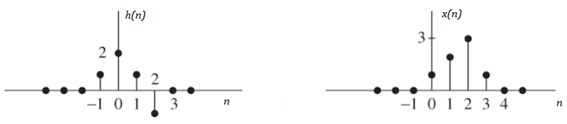

## a) Calcule a convolução entre h(n-1) e x(n-2). Plote o resultado. OBS: para calcular o resultado desta convolução, utilize um algoritmo desenvolvido por você.



### Plotando os sinais h(n) e x(n) e também suas versões deslocadas.

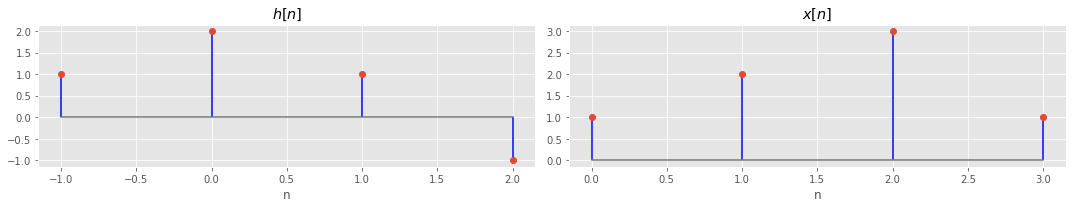

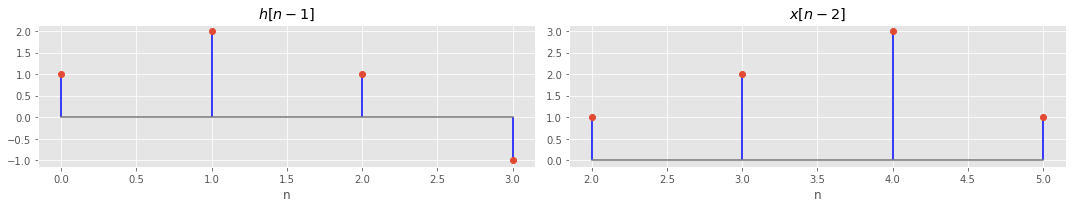

In [ ]:
h_n = [1,2,1,-1]
n1 = [-1,0,1,2]
x_n = [1,2,3,1]
n2 = [0,1,2,3]

# Plotando os gŕaficos iniciais
plt.rcParams['figure.figsize'] = (15, 3)

plt.subplot(1,2,1)
plt.title("$h[n]$")
plt.xlabel("n")
plt.stem(n1, h_n, 'b',use_line_collection=True)

plt.subplot(1,2,2)
plt.title("$x[n]$")
plt.xlabel("n")
plt.stem(n2, x_n, 'b',use_line_collection=True)


plt.tight_layout()
plt.show()

# Deslocamento dos sinais os sinais
for i in range(len(n1)):
  n1[i] = n1[i]+1 #h(n-1)

for i in range(len(n2)): #h(n-2)
  n2[i] = n2[i]+2

  # Plotting results
plt.rcParams['figure.figsize'] = (15, 3)

plt.subplot(1,2,1)
plt.title("$h[n-1]$")
plt.xlabel("n")
plt.stem(n1, h_n, 'b',use_line_collection=True)

plt.subplot(1,2,2)
plt.title("$x[n-2]$")
plt.xlabel("n")
plt.stem(n2, x_n, 'b',use_line_collection=True)


plt.tight_layout()
plt.show()

### Funções criadas por mim para convolução e também para plotagem do resultado

In [ ]:
def manual_convolution(x1_n, x2_n):
    # Definition of the result list
    result = []
    #Size of convolution result list
    result_len = len(x1_n)+len(x2_n)-1 

    for n in range(result_len):
        aux_sum = 0
        for k in range(len(x1_n)):
            # Guarantee taht there is no overlaps
            if (n-k >= 0) and (len(x2_n) > n-k):
                # Convolution's definition
                aux_sum += x1_n[k] * x2_n[n-k] 
        
        # Add the step result to the result list
        result.append(aux_sum)

    return result

def convolution_plotter(h_n, n1, x_n, n2):
  
  # Define the first index for the convolution plotting
  if(n1[0]>n2[0]):
    start_index = (n1[0]-n2[0])
  else:
    start_index = (n2[0]-n1[0])

  # Executing the convolution
  y_n = manual_convolution(h_n, x_n)
  n3 = list(range(start_index, len(y_n)+(start_index)))

  # Plotting results
  plt.rcParams['figure.figsize'] = (15, 3)

  plt.subplot(1,3,1)
  plt.title("$h[n-1]$")
  plt.xlabel("n")
  plt.stem(n1, h_n, 'b',use_line_collection=True)

  plt.subplot(1,3,2)
  plt.title("$x[n-2]$")
  plt.xlabel("n")
  plt.stem(n2, x_n, 'b',use_line_collection=True)

  plt.subplot(1,3,3)
  plt.title("$y[n] = h[n-1]*x[n-2]$")
  plt.xlabel("n")
  plt.stem(n3, y_n, 'b',use_line_collection=True)

  plt.tight_layout()
  plt.show()

### Realizando a convolução e plotando o resultado:

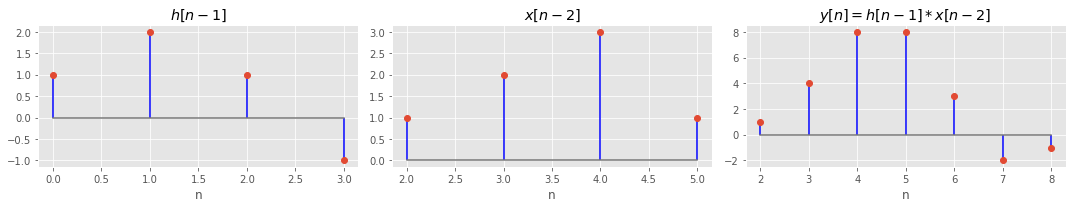

In [ ]:
convolution_plotter(h_n,n1,x_n,n2)

## b) Calcule a transformada discreta de Fourier (TDF) do resultado da convolução entre h(n-1) e x(n-2). Qual o valor DC deste sinal? O que o valor DC significa?

In [ ]:
y_n = manual_convolution(h_n, x_n)

y_n_fft = np.abs(fftpack.fft(y_n))

print("O valor DC deste sinal é: ",y_n_fft[0])

O valor DC deste sinal é:  21.0


O valor DC representa a quantidade em que o sinal é deslocado acima ou abaixo do eixo. Podemos dizer que, matematicamente, ele representa a amplitude média de um sinal.

## c) Plote os gráficos de (amplitude x frequência) e (fase x frequência) do sinal com os dados calculados a partir da letra b. Suponha para isso que a taxa de amostragem dos sinais seja de 100 Hz.

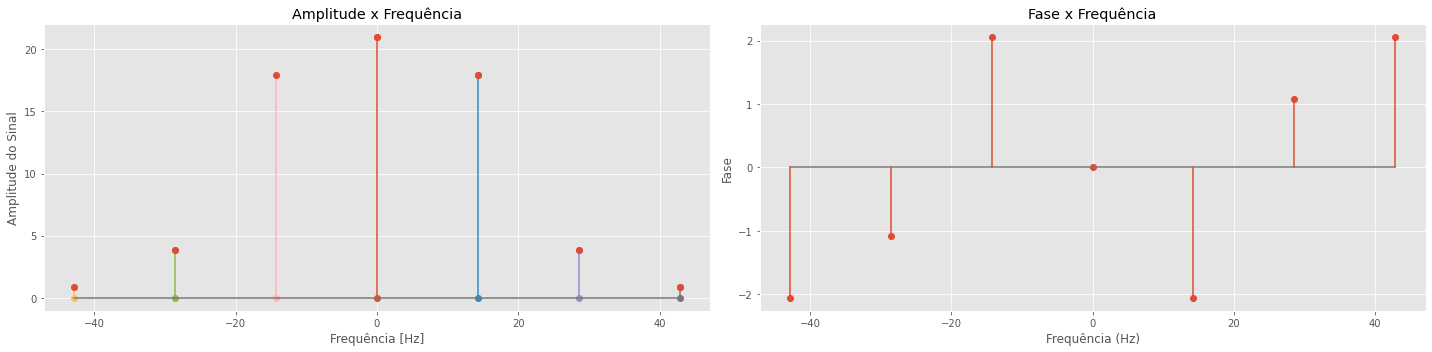

In [ ]:
y_n_fft = fftpack.fft(y_n)
magnitude = np.abs(y_n_fft)
y_n_frequencia = fftpack.fftfreq(y_n_fft.size, d=1/100)
fase = np.angle(y_n_fft)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.stem(y_n_frequencia, magnitude, '-o')
plt.title("Amplitude x Frequência")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Amplitude do Sinal")

plt.subplot(1,2,2)
plt.stem(y_n_frequencia, fase)
plt.title("Fase x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fase")

plt.tight_layout()
plt.show()